# Linear Regression Project
## The Boston Housing Price Prediction Project

The goal of this project is to create and evaluate a linear regression model for predicting house prices based on certain parameters. The model will be used to forecast the financial worth of a home in the Boston area if we have a satisfactory fit. This project could be helpful to real estate agents and aspiring home owners who could use this model in forecasting the prices of homes. 

### The Data set

The dataset used in this project was obtained from the Kaggle data Repository. The Boston Housing Dataset was derived from data collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

crim - per capita crime rate by town

zn - proportion of residential land zoned for lots over 25,000 sq.ft.

indus - proportion of non-retail business acres per town.

chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

nox - nitric oxides concentration (parts per 10 million)

rm - average number of rooms per dwelling

age - proportion of owner-occupied units built prior to 1940

dis - weighted distances to five Boston employment centres

rad - index of accessibility to radial highways

tax - full-value property-tax rate per $10,000

ptratio - pupil-teacher ratio by town

black - calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town

lstat - % lower status of the population

medv - Median value of owner-occupied homes in $1000's

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


### Interpretation
Out of the 14 columns in the dataset, three of the columns are integers and the rest 11 of them are float

In [4]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Interpretation

In the above line of code, i tried to describe the summary statistics of the dataset. A few observations are made here about the dataset. First, the column zn recorded 0.000000 for the min, 25% and 50% row fields. Secondly, the column chas recorded 0.000000 for the min, 25% 50% and 75% row fields. A closer look at the main dataset will reveal that these output are so because both columns are made up of conditional and categorical variables.
What can be made out of this output is that, the two coulms may not be useful in regression task such as predicting the target variable MEDV (Median value of owner-occupied homes).

**Impotant Note**
There is an unamed column in the dataset. this has to do with the numbering of the rows in the dataset. It is important that we remove the unknown labeled column from the dataset.

In [5]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

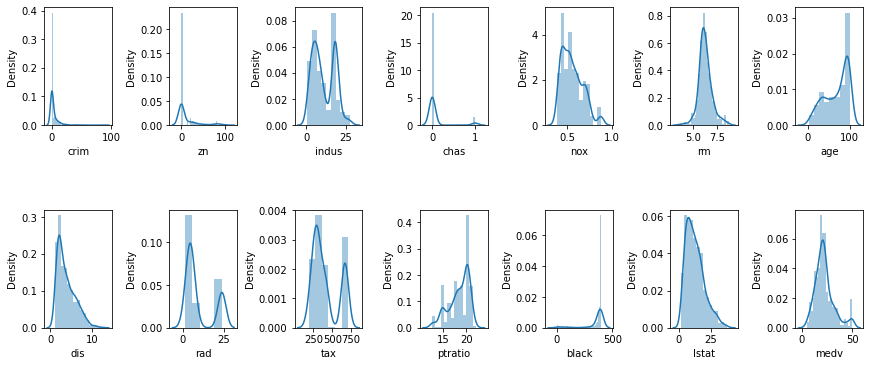

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From the histogram, it can be seen that, rm, dis, medv, and lstat are almost normally distributed. while crim, zn, chas, black, and ptratio are skewed either to the left or right (but essentially, they are skewed).

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

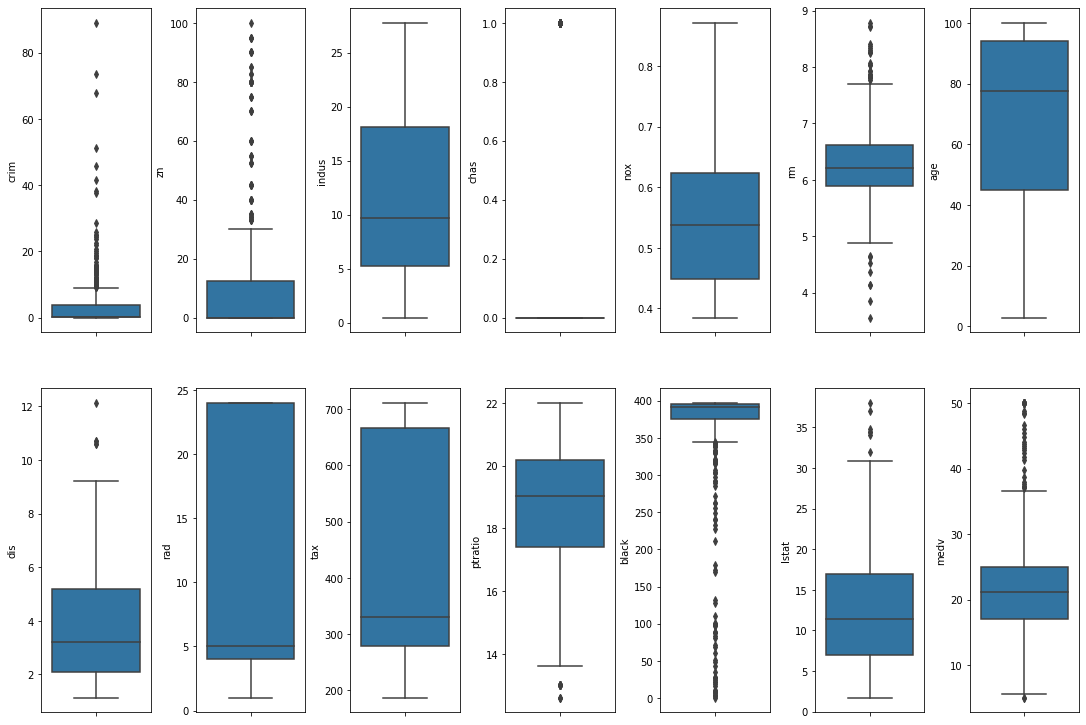

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

***Dealing with Outliers***

There appears to be some outliers within some of the columns in the dataset. In it important for us to deal with these outliers. This is because, when we neglect to deal with these outliers, it has the potential to affect out machine learning model. Machine learning algorithms are sensitive to the range and distribution of attribute values. Data outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results.

In [8]:
# calculating outliers percentages
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column black outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


In [9]:
# removing outliers for only the medv column
df = df[~(df['medv'] >= 50.0)]
print(np.shape(df))

(490, 14)


In [10]:
corr_matrix=df.corr()
corr_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
zn,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
indus,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
chas,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
nox,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
rm,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
age,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
dis,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
rad,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
tax,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


There are missing values in the chas column hence we drop that column

<AxesSubplot:>

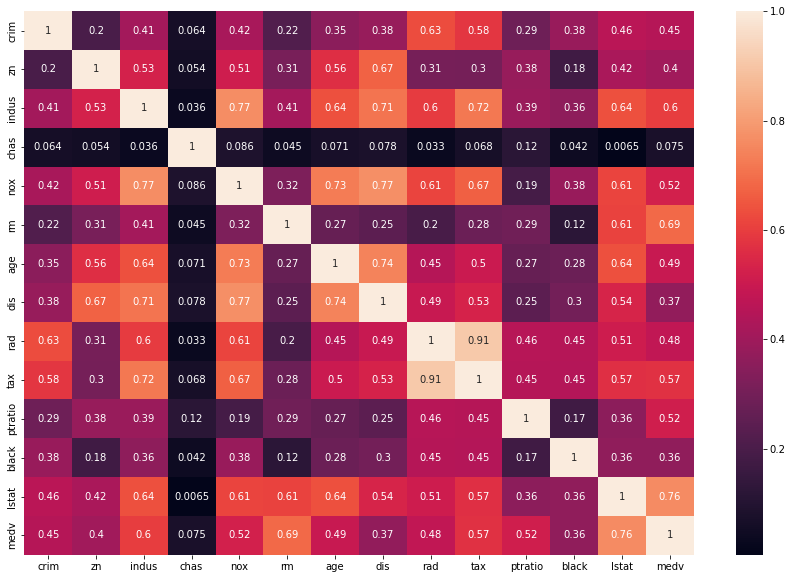

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr().abs(),  annot=True)

A critical examination of the correlation heatmap above reveals to us that the columns 'indus', 'nox', 'rm', 'dis', 'tax','ptratio', 'lstat' have a good correlation with the target variable 'medv' and thus are very suitable for the prediction.

Let's scale the columns then plot them against the target variable medv

In [12]:
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-0.41740129,  0.30181252, -1.29185589, ...,  0.44353452,
        -1.12267925,  0.3008782 ],
       [-0.41499231, -0.4869242 , -0.59332877, ...,  0.44353452,
        -0.53477219, -0.00457135],
       [-0.41499461, -0.4869242 , -0.59332877, ...,  0.39955339,
        -1.25693687,  1.66267415],
       ...,
       [-0.41115333, -0.4869242 ,  0.11987329, ...,  0.44353452,
        -1.02940553,  0.28815114],
       [-0.40554922, -0.4869242 ,  0.11987329, ...,  0.40625322,
        -0.91069353,  0.04633691],
       [-0.41268548, -0.4869242 ,  0.11987329, ...,  0.44353452,
        -0.71284019, -1.23909665]])

In [13]:
pred_var = ['indus', 'nox', 'rm', 'dis', 'tax','ptratio', 'lstat']
X = df.loc[:,pred_var]
Y = df['medv']

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(392, 7)
(98, 7)
(392,)
(98,)


** Using the model_selection.train_test_split from sklearn, i will split the data into training and testing sets. Set test_size=0.2 and random_state=101**

## Training the Model

Now its time to train our model on our training data!

**Creating an instance of a LinearRegression() model named lm.**

In [15]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [16]:
lm.fit(X_train,Y_train)

LinearRegression()

**Print out the coefficients of the model**

In [17]:
print(lm.intercept_)

35.340107766746044


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [18]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

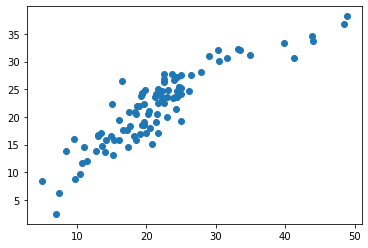

In [19]:
plt.scatter(Y_test,predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 2.766161617248939
MSE: 14.221556080587037
RMSE: 3.7711478465564086


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

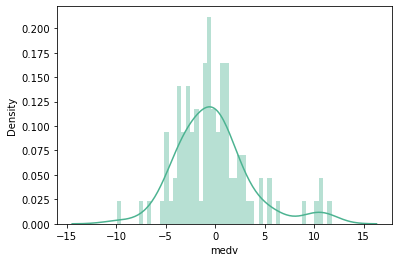

In [21]:
sns.distplot((Y_test-predictions),bins=50, color = "#4CB391");

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
indus,-0.144392
nox,-12.971335
rm,3.356556
dis,-0.838085
tax,-0.003462
ptratio,-0.851247
lstat,-0.420379


** Interpreting the coefficients?**

***The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.***

***A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.***

***In the instant case, 'rm' is the only independent variable that has a positive influence on the target variable. This means that, a 3.356556 increase in 'rm' will result in the increase of the dependent variable.*** 

***On the other hand, an increase in 'indus', 'nox', 'dis', 'tax', 'ptratio', and 'istat' will result in a decrease in the target variable 'medv'.***